# Building a Simple Inverted Index

In this notebook, we will implement an inverted index structure.   
The inverted index is a data structure that maps each term to the list of documents that contain the term (also called **postings** list). The inverted index is a central data structure in information retrieval systems. It allows us to quickly find and retrieve the documents in which a term appears.

In this notebook, we will test document retrieval with and without indexing, and compare the time taken for each method.


## Data
For the sake of the exercise, you can choose between two corpus:
* The fairy tales corpus: a collection of ~250 fairy tales from the Gutenberg project. The corpus is available in the file `fairytales.csv.zip`, and contains the following columns:
    * `title`: the title of the fairy tale
    * `content`: the content of the fairy tale
    While the csv is zipped, you don't have to unzip it, you can read it directly using pandas' `read_csv` method with the `compression` parameter set to `zip`, like so:

    ```python
    df = pd.read_csv('fairytales.csv.zip', compression='zip')
    ```
* Or the heavier corpus: `stories.zip`, which contains a collection of 230 books, each divided into chapters as a separate text file. To use the corpus, you don't need to unzip it, you can read the files directly from the zip file, using the python's zipfile module. Here's an example:
    ```python
    from zipfile import ZipFile

    with ZipFile('stories.zip', 'r') as zip_ref:
        # looping over the folders using the `namelist` method:
        for file in zip_ref.namelist():
            with zip_ref.open(file) as f:
                text = f.read().decode('utf-8')

                # some naive tokenization - spliting the text by space. You can do better than this ;)
                tokens = text.split()
                for token in tokens:
                    print(token)
    ```
You can also mix and merge both corpora, if you wish.

In [23]:
import pandas as pd
import numpy as np
import time

In [24]:
url = 'https://github.com/fubotz/IR_2025S/raw/main/fairytales.csv.zip'
df = pd.read_csv(url, compression='zip')

In [25]:
df

,title,content,content_length
0,king-kojata,There was once upon a time a king called Kojat...,5874
1,fairy-gifts,It generally happens that people's surrounding...,1914
2,jack-my-hedgehog,There was once a farmer who lived in great com...,2705
3,alleleiraugh-or-the-many-furred-creature,There was once upon a time a King who had a wi...,2769
4,jorinde-and-joringel,There was once upon a time a castle in the mid...,1294
...,...,...,...
273,neighbor-underground,Once upon a time there was a peasant who lived...,983
274,lucky-andrew,There was once a rich peasant who had two sons...,2782
275,troll-wife,"Once upon a time, long, long years ago, there ...",1358
276,three-princesses-in-whiteland,"Once upon a time there was a fisherman, who li...",2690


## Linear Search

Let's start with a simple linear search.
Given a query string, the function `linear_search` should return a list of documents (or document ids) that contain it.

Implement the function `linear_search` below, and measure its execution time for some example queries. Store these results and measure the mean the standard deviation of these times.

In [26]:
# Here are some ideas for queries. You can also come up with your own, or mix and match terms from different queries.
queries = [     # n=32
    "warrior",
    "hunter",
    "lodge",
    "father",
    "king",
    "forest",
    "magic",
    "sword",
    "queen",
    "princess",
    "castle",
    "home",
    "dream",
    "fish",
    "sleep",
    "life",
    "ship",
    "luck",
    "wisdom",
    "hand",
    "pig",
    "child",
    "friend",
    "love",
    "woman",
    "pancake",
    "money",
    "bank",
    "arrow",
    "slave",
    "music",
    "work",
    "respect"
]

In [27]:
### YOUR CODE HERE ###
def linear_search(documents, query: str):
    """
    Perform a simple linear search to find documents containing the query string.
    """
    results = []
    for i, doc in enumerate(documents):
        if query.lower() in doc.lower():
            results.append(i)
    return results


titles = df['title'].tolist()
documents = df['content'].tolist()
times = []

# Measure execution time for each query
search_results = {}
for query in queries:
    start_time = time.time()
    indices = linear_search(documents, query)
    end_time = time.time()
    times.append(end_time - start_time)
    search_results[query] = [titles[i] for i in indices]    # Retrieve matching titles

# Compute statistics
mean_time = np.mean(times)
std_dev_time = np.std(times)

# Store results in a DataFrame and display
results_df = pd.DataFrame({
    "Query": queries,
    "Execution Time (s)": times,
    "Matching Titles": [search_results[q] for q in queries]
})

display(results_df)
print(f"Mean Execution Time: {mean_time:.7f} seconds")
print(f"Standard Deviation: {std_dev_time:.7f} seconds")

,Query,Execution Time (s),Matching Titles
0,warrior,0.011858,"[the-war-of-the-wolf-and-the-fox, the-winning-..."
1,hunter,0.013579,"[the-witch-of-fife, the-coming-of-finn, brothe..."
2,lodge,0.009320,"[the-history-of-jack-the-giant-killer, the-bro..."
3,father,0.007500,"[king-kojata, jack-my-hedgehog, alleleiraugh-o..."
4,king,0.005552,"[king-kojata, fairy-gifts, jack-my-hedgehog, a..."
5,forest,0.007479,"[king-kojata, jack-my-hedgehog, alleleiraugh-o..."
6,magic,0.006676,"[king-kojata, fairy-gifts, the-history-of-jack..."
7,sword,0.007088,"[king-kojata, the-history-of-jack-the-giant-ki..."
8,queen,0.007080,"[king-kojata, alleleiraugh-or-the-many-furred-..."
9,princess,0.008683,"[king-kojata, fairy-gifts, jack-my-hedgehog, a..."


Mean Execution Time: 0.007476 seconds
Standard Deviation: 0.001714 seconds


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

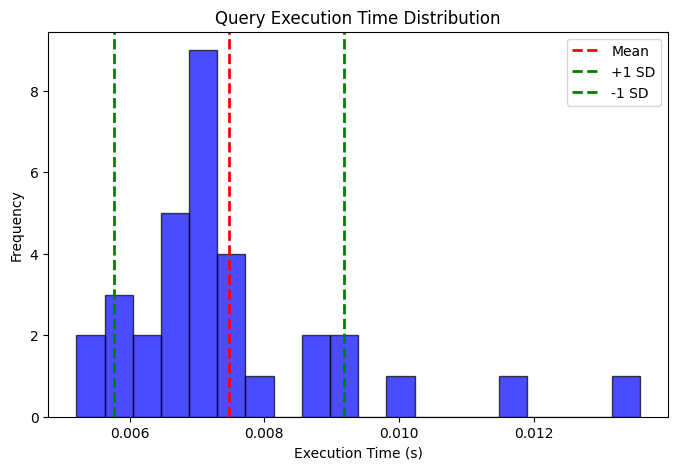

In [31]:
# Plot mean and sd of linear search
plt.figure(figsize=(8, 5))
plt.hist(times, bins=20, color='blue', edgecolor='black', alpha=0.7)

# Mean and standard deviation lines
plt.axvline(mean_time, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_time + std_dev_time, color='green', linestyle='dashed', linewidth=2, label='+1 SD')
plt.axvline(mean_time - std_dev_time, color='green', linestyle='dashed', linewidth=2, label='-1 SD')

# Labels and legend
plt.xlabel("Execution Time (s)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Query Execution Time Distribution")

plt.show()

Q: How long did it take your ur linear search to find the documents for each query?
Q: What was the mean and standard deviation of these times?


### Measuring execution times:

To measure the execution time of a function, you can use the `time` module in Python. Here's an example of how to use it:
```python
import time
start_time = time.time()

# Your code here

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
```

---

But you can make it even smarter, with reusable code, by [using a decorator](https://www.geeksforgeeks.org/timing-functions-with-decorators-python/):
```python
from time import time

def timer_func(func):
    """This function shows the execution time of the function object passed"""
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.4f}s')
        return result
    return wrap_func

@timer_func
def long_time(n):
    for i in range(n):
        for j in range(100000):
            i*j

long_time(5)
# Output: Function 'long_time' executed in 0.0468s
```

## Inverted Index

Now let's implement an inverted index. This will allow us to retrieve documents much faster than linear search.
Implement a simple inverted index. You can use the following class as a starting point, or create your own.

We will start simple: Just store the document IDs in a list for each token. If you want to be more advanced, you can store the document IDs as tuples, or a more complex object that stores the document ID and the position of the token in the document.  
**Remember**: you are the queens, kings and gods in this realm. You can do whatever you want.


In [32]:
### YOUR CODE HERE ###
class InvertedIndex:
    def __init__(self):
        self.index = {}
        self.documents = []

    def add_document(self, doc_id, tokens):
        self.documents.append(doc_id)
        for token in tokens:
            if token not in self.index:
                self.index[token] = []
            self.index[token].append(doc_id)

    def get_postings(self, token):
        return self.index.get(token, [])

    def get_documents(self):
        return self.documents

In [34]:
def tokenize(text):
    """
    Tokenizes the input text into words (simple whitespace splitting for now).
    """
    return text.lower().split()

# Build the inverted index
inverted_index = InvertedIndex()
for doc_id, doc in enumerate(documents):
    tokens = tokenize(doc)
    inverted_index.add_document(doc_id, tokens)

In [39]:
index_search_times = []
index_search_results = {}
for query in queries:
    start_time = time.time()
    indices = inverted_index.get_postings(query)
    end_time = time.time()
    index_search_times.append(end_time - start_time)
    index_search_results[query] = [titles[i] for i in indices]  # Retrieve matching titles

# Compute statistics
index_mean_time = np.mean(index_search_times)
index_std_dev_time = np.std(index_search_times)

# Store results in a DataFrame and display
index_results_df = pd.DataFrame({
    "Query": queries,
    "Execution Time (s)": index_search_times,
    "Matching Titles": [index_search_results[q] for q in queries]
})

pd.options.display.float_format = '{:.7f}'.format
display(index_results_df)
print(f"Mean Execution Time: {index_mean_time:.7f} seconds")
print(f"Standard Deviation: {index_std_dev_time:.7f} seconds")

,Query,Execution Time (s),Matching Titles
0,warrior,0.0000057,"[the-coming-of-finn, story-of-prince-yamato-ta..."
1,hunter,0.0000026,"[the-coming-of-finn, brother-sister, brother-s..."
2,lodge,0.0000021,"[the-history-of-jack-the-giant-killer, the-ori..."
3,father,0.0000014,"[king-kojata, king-kojata, king-kojata, king-k..."
4,king,0.0000010,"[king-kojata, king-kojata, king-kojata, king-k..."
5,forest,0.0000014,"[jack-my-hedgehog, jack-my-hedgehog, jack-my-h..."
6,magic,0.0000017,"[the-magic-mirror, the-magic-mirror, the-magic..."
7,sword,0.0000019,"[the-history-of-jack-the-giant-killer, the-his..."
8,queen,0.0000012,"[king-kojata, king-kojata, king-kojata, king-k..."
9,princess,0.0000012,"[king-kojata, king-kojata, king-kojata, king-k..."


Mean Execution Time: 0.0000014 seconds
Standard Deviation: 0.0000009 seconds


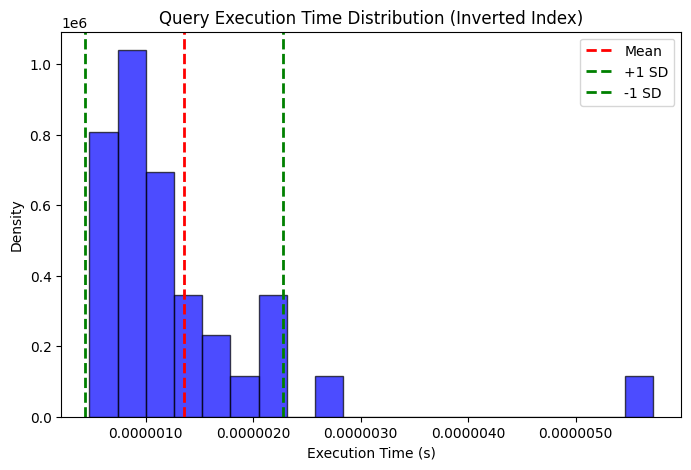

In [41]:
# Plot mean and sd of indexed search
plt.figure(figsize=(8, 5))
plt.hist(index_search_times, bins=20, color='blue', edgecolor='black', alpha=0.7, density=True)

# Mean and standard deviation lines
plt.axvline(index_mean_time, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(index_mean_time + index_std_dev_time, color='green', linestyle='dashed', linewidth=2, label='+1 SD')
plt.axvline(index_mean_time - index_std_dev_time, color='green', linestyle='dashed', linewidth=2, label='-1 SD')

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.7f'))

# Labels and legend
plt.xlabel("Execution Time (s)")
plt.ylabel("Density")
plt.legend()
plt.title("Query Execution Time Distribution (Inverted Index)")

# Show plot
plt.show()

Experiment again with the previous queries on the invertedt index, and time the results.  
How long did it take to retrieve the documents for these same queries? What was the mean and standard deviation of these execution times?